## todo


- add cm
- add xgboost to custom.json
- add cleaning
- add t-SNE
- add other datasets
- - iris, moon, blobs


In [ ]:
## Global Settings

In [ ]:
CLUSTER_ALGO = 'KMedoids'
CLUSTER_ALGO = 'KMedoids'
N_CLUSTERS = [21]
CLUSTERS_STD = 0.1
N_P_CLUSTERS = [3,30, 100, 300, 3000]

In [1]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons



In [2]:
%load_ext autoreload
%autoreload 2
packages = !conda list
packages

['# packages in environment at /opt/conda:',
 '#',
 '# Name                    Version                   Build  Channel',
 '_libgcc_mutex             0.1                 conda_forge    conda-forge',
 '_openmp_mutex             4.5                       0_gnu    conda-forge',
 'alembic                   1.4.2              pyh9f0ad1d_0    conda-forge',
 'astroid                   2.4.1                    pypi_0    pypi',
 'astunparse                1.6.3                    pypi_0    pypi',
 'async_generator           1.10                       py_0    conda-forge',
 'attrs                     19.3.0                     py_0    conda-forge',
 'backcall                  0.1.0                      py_0    conda-forge',
 'bleach                    3.1.4              pyh9f0ad1d_0    conda-forge',
 'blinker                   1.4                        py_1    conda-forge',
 'brotlipy                  0.7.0           py37h8f50634_1000    conda-forge',
 'ca-certificates           2020.4.5.1     

In [3]:
!pwd


/docker/photon_experiments


## Output registry

In [4]:
from __future__ import print_function
import sys, os

old__file__ = !pwd
__file__ = !cd ../photon ;pwd
#__file__ = !pwd
__file__ = __file__[0]
__file__
sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
old__file__[0]

['/docker/photon_experiments', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jovyan/.ipython', '/docker/photon']
/docker/photon_experiments


'/docker/photon_experiments'

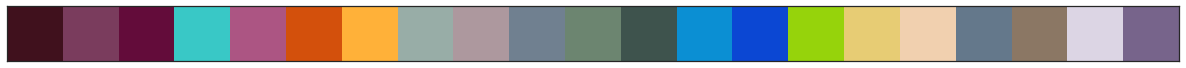

In [30]:
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#40111D', '#7A3C5D', '#630C3A'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'
                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#E7CC74','#F1D0AF','#64788B'                 
                 ,'#8B7764','#DCD5E4','#77648B',]
sns.set_palette(customPalette)
sns.palplot(customPalette)


from clusim.clustering import Clustering, remap2match
import clusim.sim as sim

from photonai.base import Hyperpipe, PipelineElement, Preprocessing, OutputSettings
from photonai.optimization import FloatRange, Categorical, IntegerRange
from photonai.base.photon_elements import PhotonRegistry
from photonai.visual.graphics import plot_cm
#from photonai.base.registry.registry import PhotonRegistry

In [6]:
#import pixiedust


In [7]:
def results_to_df(results):
    ll = []
    for obj in results:
        ll.append([obj.operation,
        obj.value,
        obj.metric_name])
    _results=pd.DataFrame(ll).pivot(index=2, columns=0, values=1)
    _results.columns=['Mean','STD']
    
    return(_results)

In [8]:
__file__ = "exp1.log"
base_folder = os.path.dirname(os.path.abspath(''))
custom_elements_folder = os.path.join(base_folder, 'custom_elements')
custom_elements_folder

'/docker/custom_elements'

In [9]:
registry = PhotonRegistry(custom_elements_folder=custom_elements_folder)
registry.activate()
registry.PHOTON_REGISTRIES,PhotonRegistry.PHOTON_REGISTRIES

(['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'],
 ['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'])

In [10]:
registry.activate()
registry.list_available_elements()
# take off last name


PhotonCore
ARDRegression                       sklearn.linear_model.ARDRegression                                          Estimator
AdaBoostClassifier                  sklearn.ensemble.AdaBoostClassifier                                         Estimator
AdaBoostRegressor                   sklearn.ensemble.AdaBoostRegressor                                          Estimator
BaggingClassifier                   sklearn.ensemble.BaggingClassifier                                          Estimator
BaggingRegressor                    sklearn.ensemble.BaggingRegressor                                           Estimator
BayesianGaussianMixture             sklearn.mixture.BayesianGaussianMixture                                     Estimator
BayesianRidge                       sklearn.linear_model.BayesianRidge                                          Estimator
BernoulliNB                         sklearn.naive_bayes.BernoulliNB                                             Estimator
BernoulliRBM

## KMeans blobs

In [11]:
registry.info("KMeans")

----------------------------------
Name: KMeans
Namespace: sklearn.cluster
----------------------------------
Possible Hyperparameters as derived from constructor:
n_clusters                          n_clusters=8                                                               
init                                init='k-means++'                                                           
n_init                              n_init=10                                                                  
max_iter                            max_iter=300                                                               
tol                                 tol=0.0001                                                                 
precompute_distances                precompute_distances='auto'                                                
verbose                             verbose=0                                                                  
random_state                        random_state=Non

('KMeans',
 'sklearn.cluster',
 {'n_clusters': 'n_clusters',
  'init': 'init',
  'n_init': 'n_init',
  'max_iter': 'max_iter',
  'tol': 'tol',
  'precompute_distances': 'precompute_distances',
  'verbose': 'verbose',
  'random_state': 'random_state',
  'copy_x': 'copy_x',
  'n_jobs': 'n_jobs',
  'algorithm': 'algorithm'})

In [12]:
import sklearn.datasets as skd
NC = 21
def yield_parameters(n_p_clusters):
    n_cluster = NC
    cluster_std = 0.1

    for n_p_cluster in n_p_clusters:
        n_cluster_std = [cluster_std*k**0.5+0.2 for k in range(n_cluster)]
        print("n_cluster_std:", n_cluster_std)
        n_samples = [n_p_cluster for k in range(n_cluster)]
        data_X, data_y = make_blobs(n_samples=n_samples,
                                   cluster_std=n_cluster_std, random_state=0)
        yield [data_X, data_y]

In [13]:
#import pixiedust
#%%pixie_debugger

In [33]:
def hyper_cluster(cluster_name):
    
    n_p_clusters = [3,30, 100, 300, 3000]

    for data_X, data_y  in yield_parameters(n_p_clusters):
        print('n_points:', len(data_y))
        """
        Example script for KMedoids hopt
        """
        X = data_X.copy(); y =  data_y.copy()
        # DESIGN YOUR PIPELINE
        settings = OutputSettings(project_folder='./tmp/')

        my_pipe = Hyperpipe('batching',
                            optimizer='sk_opt',
        #                    optimizer_params={'n_configurations': 25},
                            metrics=['ARI', 'MI', 'HCV', 'FM'],
                            best_config_metric='ARI',
                            outer_cv=KFold(n_splits=5),
                            inner_cv=KFold(n_splits=10),
                            verbosity=0,
                            output_settings=settings)


        my_pipe += PipelineElement(cluster_name
                                   , hyperparameters={
                                       'n_clusters': IntegerRange(2, NC),
                                   },random_state=777)

        # NOW TRAIN YOUR PIPELINE
        my_pipe.fit(X, y)

        debug = True
    #------------------------------plot
        y_pred= my_pipe.predict(X)
        data = pd.DataFrame(data_X[:, 0],columns=['x'])
        data['y'] = data_X[:, 1]
        data['labels'] = y_pred
#        sns.set(rc={'figure.figsize':(10,10)})
        facet = sns.lmplot(data=data, x='x', y='y', hue='labels', 
                           aspect= 1.0, height=7,
                   fit_reg=False, legend=True, legend_out=True)
    
        for i, label in enumerate( np.sort(data['labels'].unique())):

        #add label
            plt.annotate(label, 
                         data.loc[data['labels']==label,['x','y']].mean(),
                         horizontalalignment='center',
                         verticalalignment='center',
                         size=10, weight='bold',
                         color='white',
                         backgroundcolor=customPalette[i]) 

        plt.show()
    #--------------------------------- best
        print(pd.DataFrame(my_pipe.best_config.items()
                           ,columns=['n_clusters', 'k']))
    #------------------------------
        print('train','\n'
              ,results_to_df(my_pipe.results.metrics_train))
        print('test','\n'
              ,results_to_df(my_pipe.results.metrics_test))
    #------------------------------   
        # turn the ground-truth labels into a clusim Clustering
        true_clustering = Clustering().from_membership_list(y) 
        kmeans_clustering = Clustering().from_membership_list(y_pred) # lets see how similar the predicted k-means clustering is to the true clustering
    #------------------------------
        # using all available similar measures!
        row_format2 ="{:>25}" * (2)
        for simfunc in sim.available_similarity_measures:
            print(row_format2.format(simfunc, eval('sim.' + simfunc+'(true_clustering, kmeans_clustering)')))
    #------------------------------# The element-centric similarity is particularly useful for understanding
    # how a clustering method performed

    # Let's start with the single similarity value:
        elsim = sim.element_sim(true_clustering, kmeans_clustering)
        print("Element-centric similarity: {}".format(elsim))

n_cluster_std: [0.2, 0.30000000000000004, 0.3414213562373095, 0.37320508075688774, 0.4, 0.423606797749979, 0.4449489742783178, 0.4645751311064591, 0.4828427124746191, 0.5, 0.516227766016838, 0.53166247903554, 0.5464101615137755, 0.5605551275463989, 0.5741657386773942, 0.5872983346207417, 0.6000000000000001, 0.6123105625617661, 0.6242640687119285, 0.6358898943540674, 0.647213595499958]
n_points: 63
***************************************************************************************************************
PHOTON ANALYSIS: batching
***************************************************************************************************************

***************************************************************************
Outer Cross validation Fold 1
*****************************************************************************
---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------

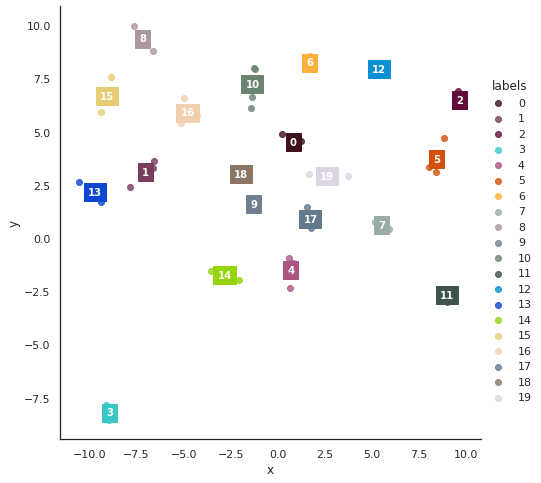

           n_clusters   k
0  KMeans__n_clusters  20
train 
          Mean       STD
2                      
ARI  0.897388  0.049511
FM   0.902630  0.045947
HCV  0.970933  0.018320
MI   0.928213  0.036493
test 
          Mean       STD
2                      
ARI  0.832907  0.157664
FM   0.657529  0.346462
HCV  0.962862  0.035330
MI   0.863852  0.113424
            jaccard_index       0.8472222222222222
               rand_index       0.9943676395289298
            adjrand_index       0.9143861410996731
    fowlkes_mallows_index       0.9185663679536721
                 fmeasure       0.9172932330827067
             purity_index       0.9523809523809523
     classification_error      0.04761904761904767
        czekanowski_index       0.9172932330827067
               dice_index       0.9172932330827067
           sorensen_index       0.9172932330827067
    rogers_tanimoto_index       0.9887983706720977
          southwood_index        5.545454545454546
      pearson_correlation    7.30

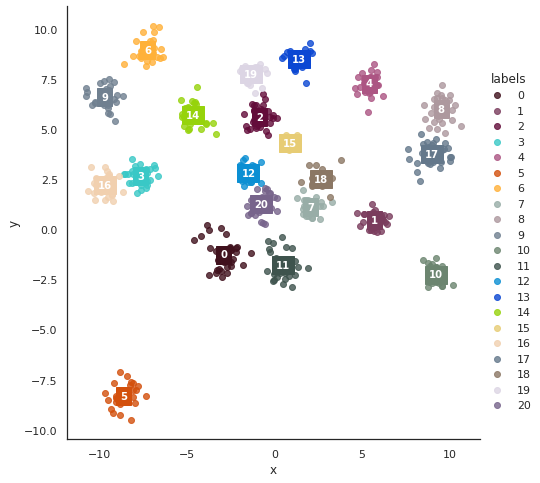

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.955773  0.007235
FM   0.957823  0.006893
HCV  0.976768  0.003534
MI   0.973045  0.004010
test 
          Mean       STD
2                      
ARI  0.950315  0.016432
FM   0.952608  0.015733
HCV  0.979383  0.006614
MI   0.963815  0.011507
            jaccard_index        0.929015271195366
               rand_index       0.9965982789512201
            adjrand_index       0.9614182983921209
    fowlkes_mallows_index       0.9632046100870054
                 fmeasure       0.9632015723957196
             purity_index       0.9809523809523809
     classification_error      0.01904761904761909
        czekanowski_index       0.9632015723957196
               dice_index       0.9632015723957196
           sorensen_index       0.9632015723957196
    rogers_tanimoto_index       0.9932196228540962
          southwood_index        13.08753709198813
      pearson_correlation    5.55

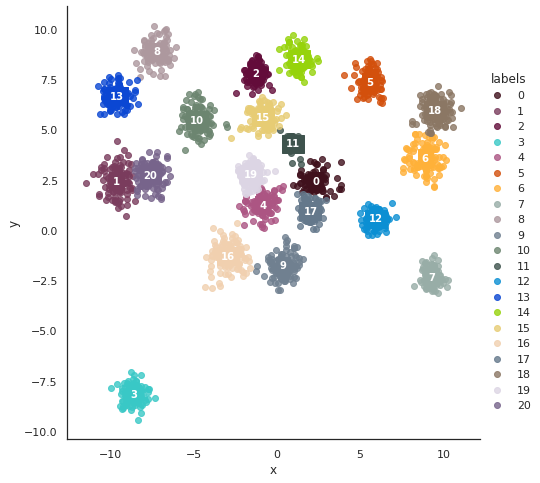

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.942817  0.018959
FM   0.945625  0.017872
HCV  0.969031  0.006934
MI   0.969056  0.005670
test 
          Mean       STD
2                      
ARI  0.942841  0.019276
FM   0.945758  0.017958
HCV  0.971430  0.007717
MI   0.967463  0.006411
            jaccard_index       0.9132643237642917
               rand_index       0.9957077066176637
            adjrand_index       0.9524133663671832
    fowlkes_mallows_index       0.9546726970081781
                 fmeasure       0.9546661299443151
             purity_index       0.9757142857142858
     classification_error     0.024285714285714244
        czekanowski_index       0.9546661299443151
               dice_index       0.9546661299443151
           sorensen_index       0.9546661299443151
    rogers_tanimoto_index       0.9914521033156984
          southwood_index       10.529281183932346
      pearson_correlation    4.34

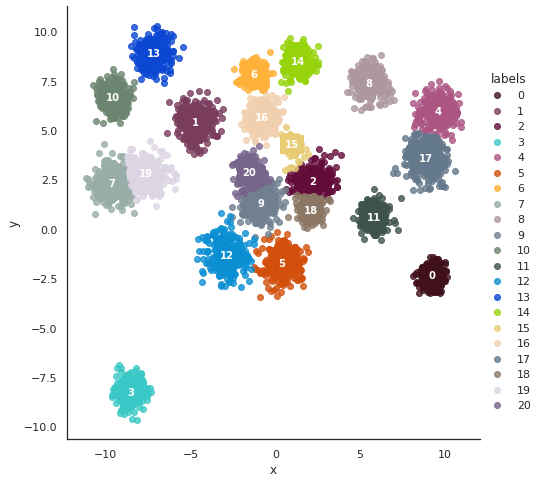

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.944682  0.016617
FM   0.947414  0.015631
HCV  0.967655  0.005560
MI   0.968431  0.003939
test 
          Mean       STD
2                      
ARI  0.939829  0.024198
FM   0.942909  0.022630
HCV  0.967256  0.007045
MI   0.966804  0.005012
            jaccard_index       0.9143532580750832
               rand_index       0.9957438444499883
            adjrand_index       0.9530263955345335
    fowlkes_mallows_index       0.9552627863563796
                 fmeasure       0.9552607432491137
             purity_index       0.9763492063492063
     classification_error       0.0236507936507937
        czekanowski_index       0.9552607432491137
               dice_index       0.9552607432491137
           sorensen_index       0.9552607432491137
    rogers_tanimoto_index       0.9915237650742988
          southwood_index        10.67586737714624
      pearson_correlation   5.343

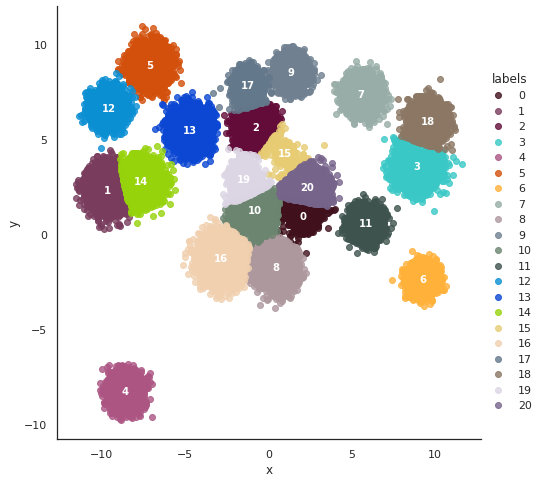

           n_clusters   k
0  KMeans__n_clusters  21
train 
          Mean       STD
2                      
ARI  0.942619  0.018328
FM   0.945462  0.017249
HCV  0.964888  0.006242
MI   0.966045  0.004568
test 
          Mean       STD
2                      
ARI  0.942332  0.019809
FM   0.945237  0.018564
HCV  0.965027  0.007091
MI   0.966246  0.005050
            jaccard_index       0.9121243396360855
               rand_index        0.995614905452014
            adjrand_index       0.9517405357807974
    fowlkes_mallows_index       0.9540452104634345
                 fmeasure       0.9540429152318416
             purity_index       0.9756984126984126
     classification_error      0.02430158730158738
        czekanowski_index       0.9540429152318416
               dice_index       0.9540429152318416
           sorensen_index       0.9540429152318416
    rogers_tanimoto_index       0.9912681011062605
          southwood_index       10.379715337088296
      pearson_correlation    5.31

In [ ]:
hyper_cluster('KMeans')